In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [3]:
data.shape

(31647, 18)

In [4]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
data.set_index('ID',inplace=True)

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [7]:
data.drop(['day','month','pdays'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 26110 to 14156
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   duration    31647 non-null  int64 
 10  campaign    31647 non-null  int64 
 11  previous    31647 non-null  int64 
 12  poutcome    31647 non-null  object
 13  subscribed  31647 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.6+ MB


In [9]:
data.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
duration      0
campaign      0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,44,2,0,unknown,no
40576,31,unknown,married,secondary,no,3,no,no,cellular,91,2,0,unknown,no
15320,27,services,married,secondary,no,891,yes,no,cellular,240,1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,867,1,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,380,1,0,unknown,no


In [11]:
cat_data = data.select_dtypes('object').columns.tolist()

In [12]:
cont_data = data.select_dtypes('int64').columns.tolist()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

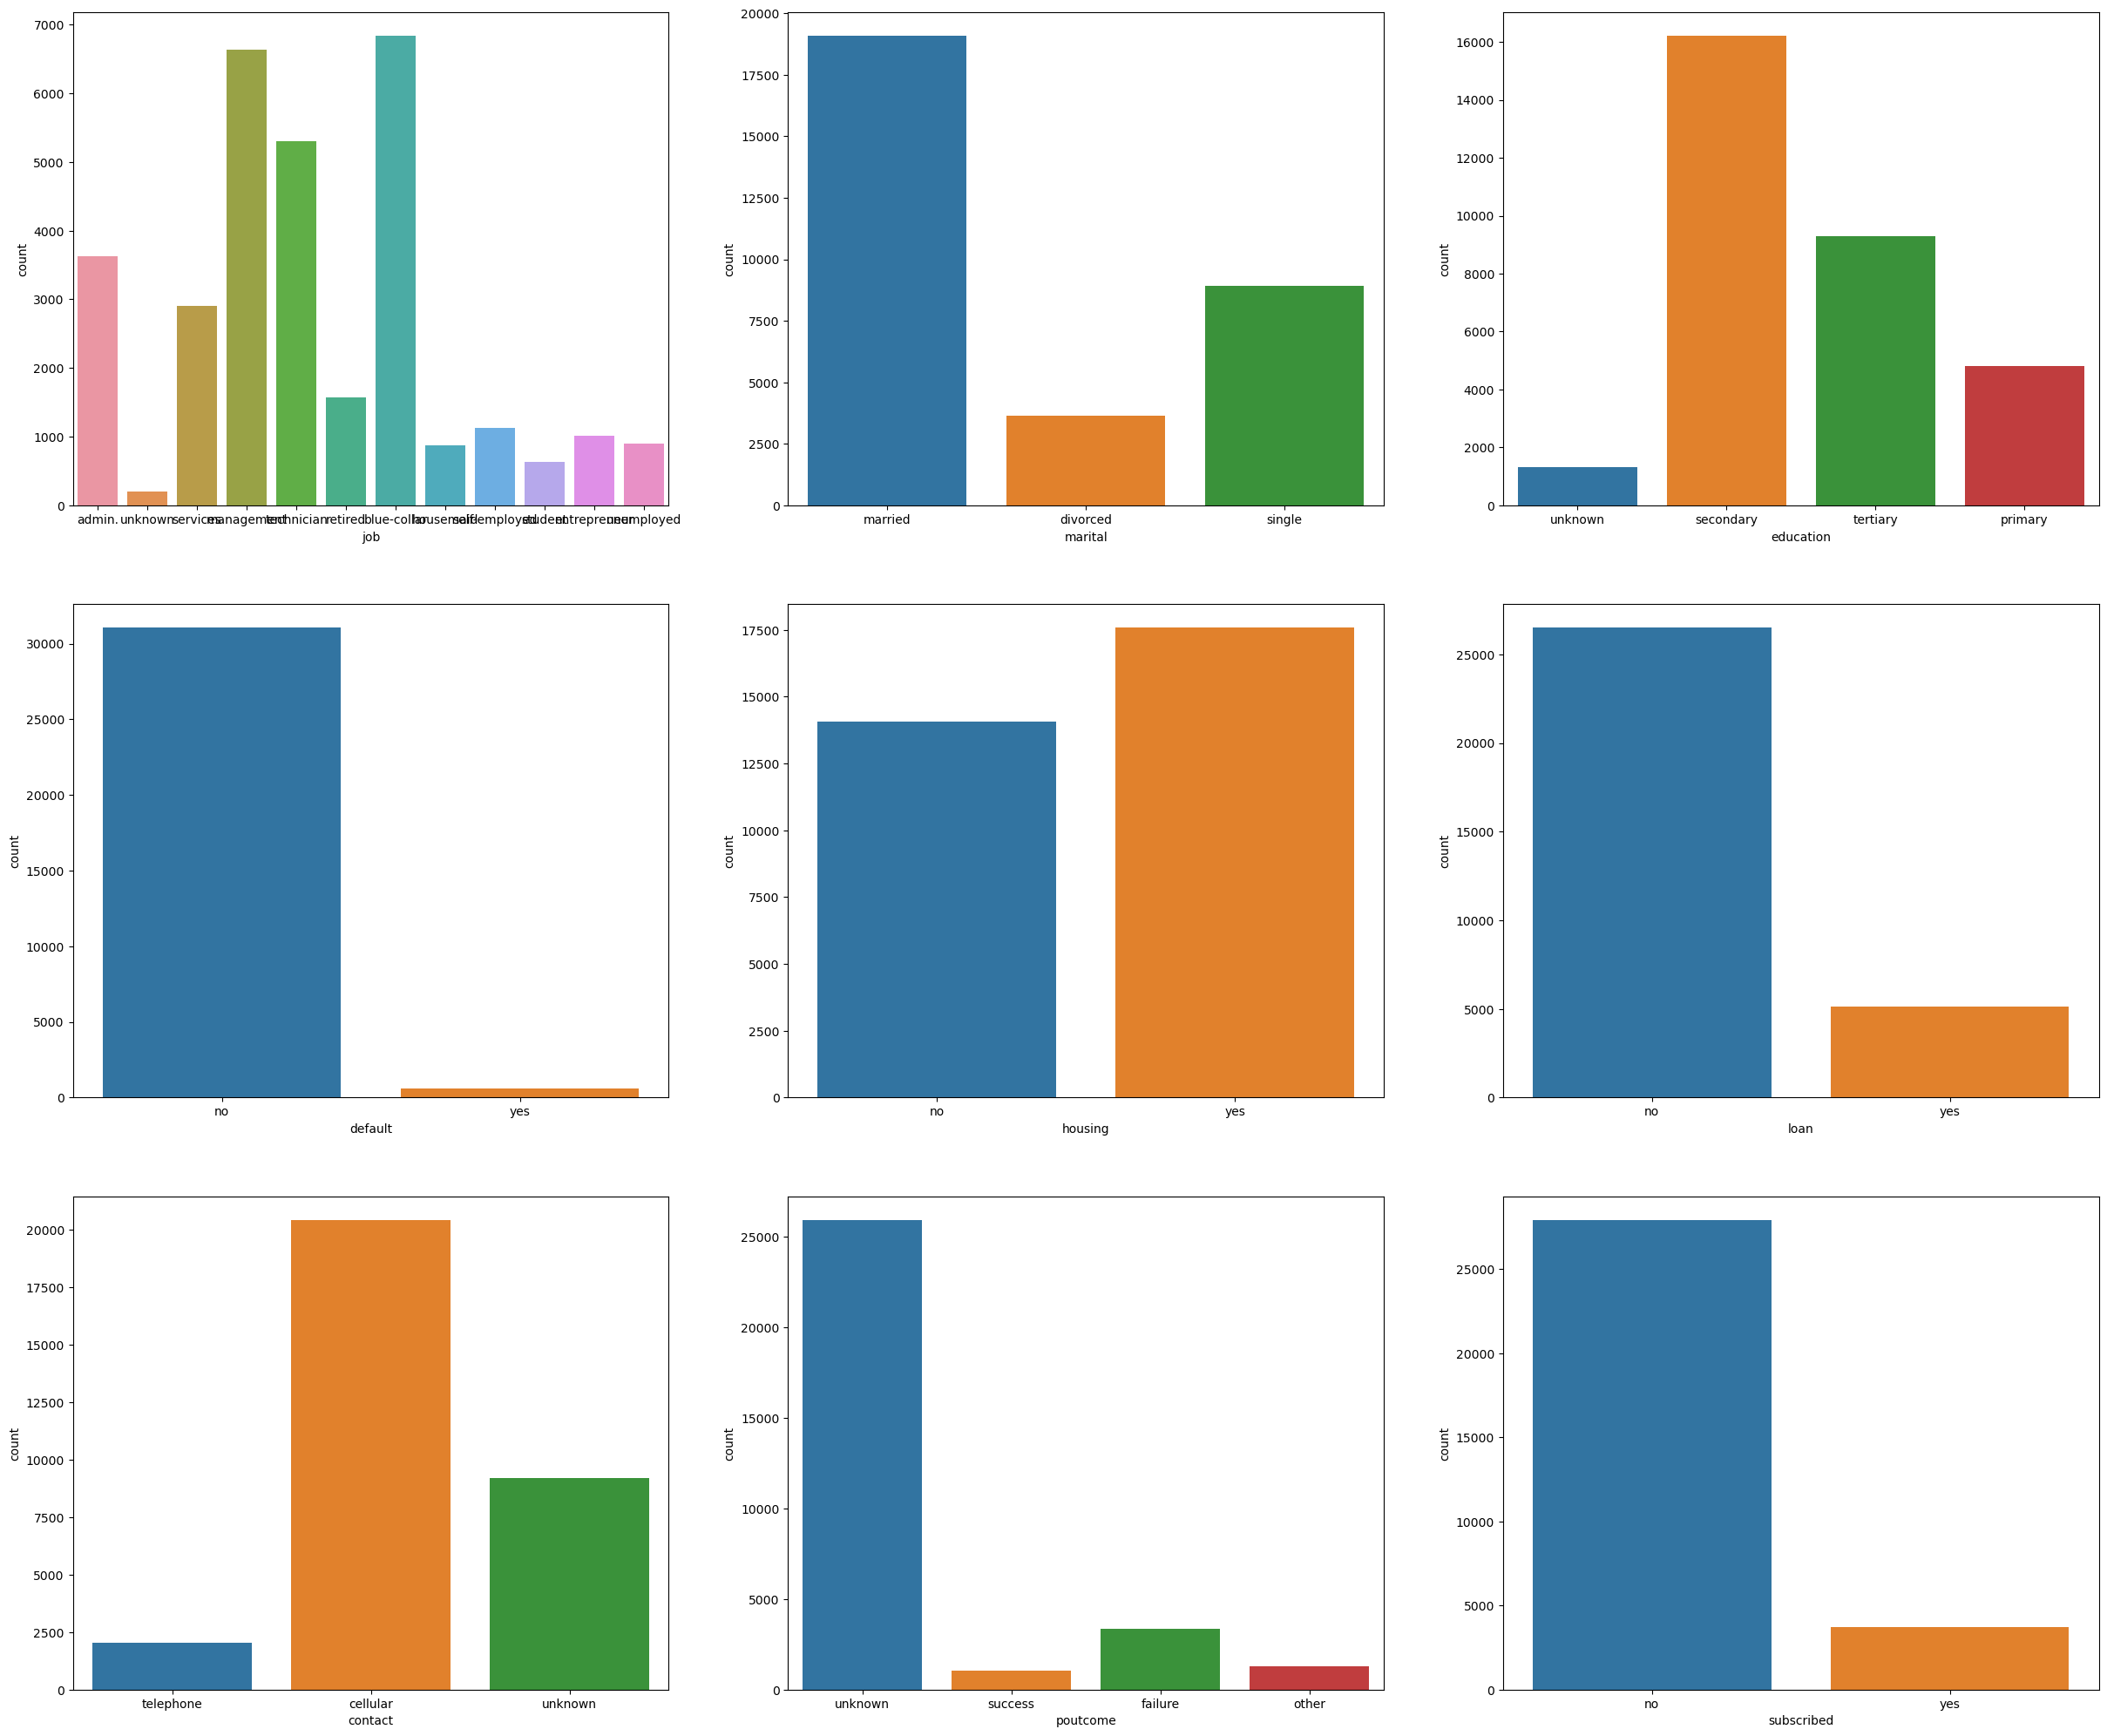

In [14]:
plt.figure(figsize=(30,25))

plotnumber = 1

for column in data[cat_data]:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.countplot(x=data[cat_data][column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [15]:
for column in data[cat_data]:
    print(f"Column Name:{column}\nTotal Unique Values:-{data[cat_data][column].nunique()} \n{data[cat_data][column].value_counts()}\n ")

Column Name:job
Total Unique Values:-12 
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
 
Column Name:marital
Total Unique Values:-3 
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
 
Column Name:education
Total Unique Values:-4 
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
 
Column Name:default
Total Unique Values:-2 
no     31062
yes      585
Name: default, dtype: int64
 
Column Name:housing
Total Unique Values:-2 
yes    17584
no     14063
Name: housing, dtype: int64
 
Column Name:loan
Total Unique Values:-2 
no     26516
yes     5131
Name: loan, dtype: int64
 
Column Name:contact
Total Unique Values:-3 
cellular     20423
unknown       9177
telephone  

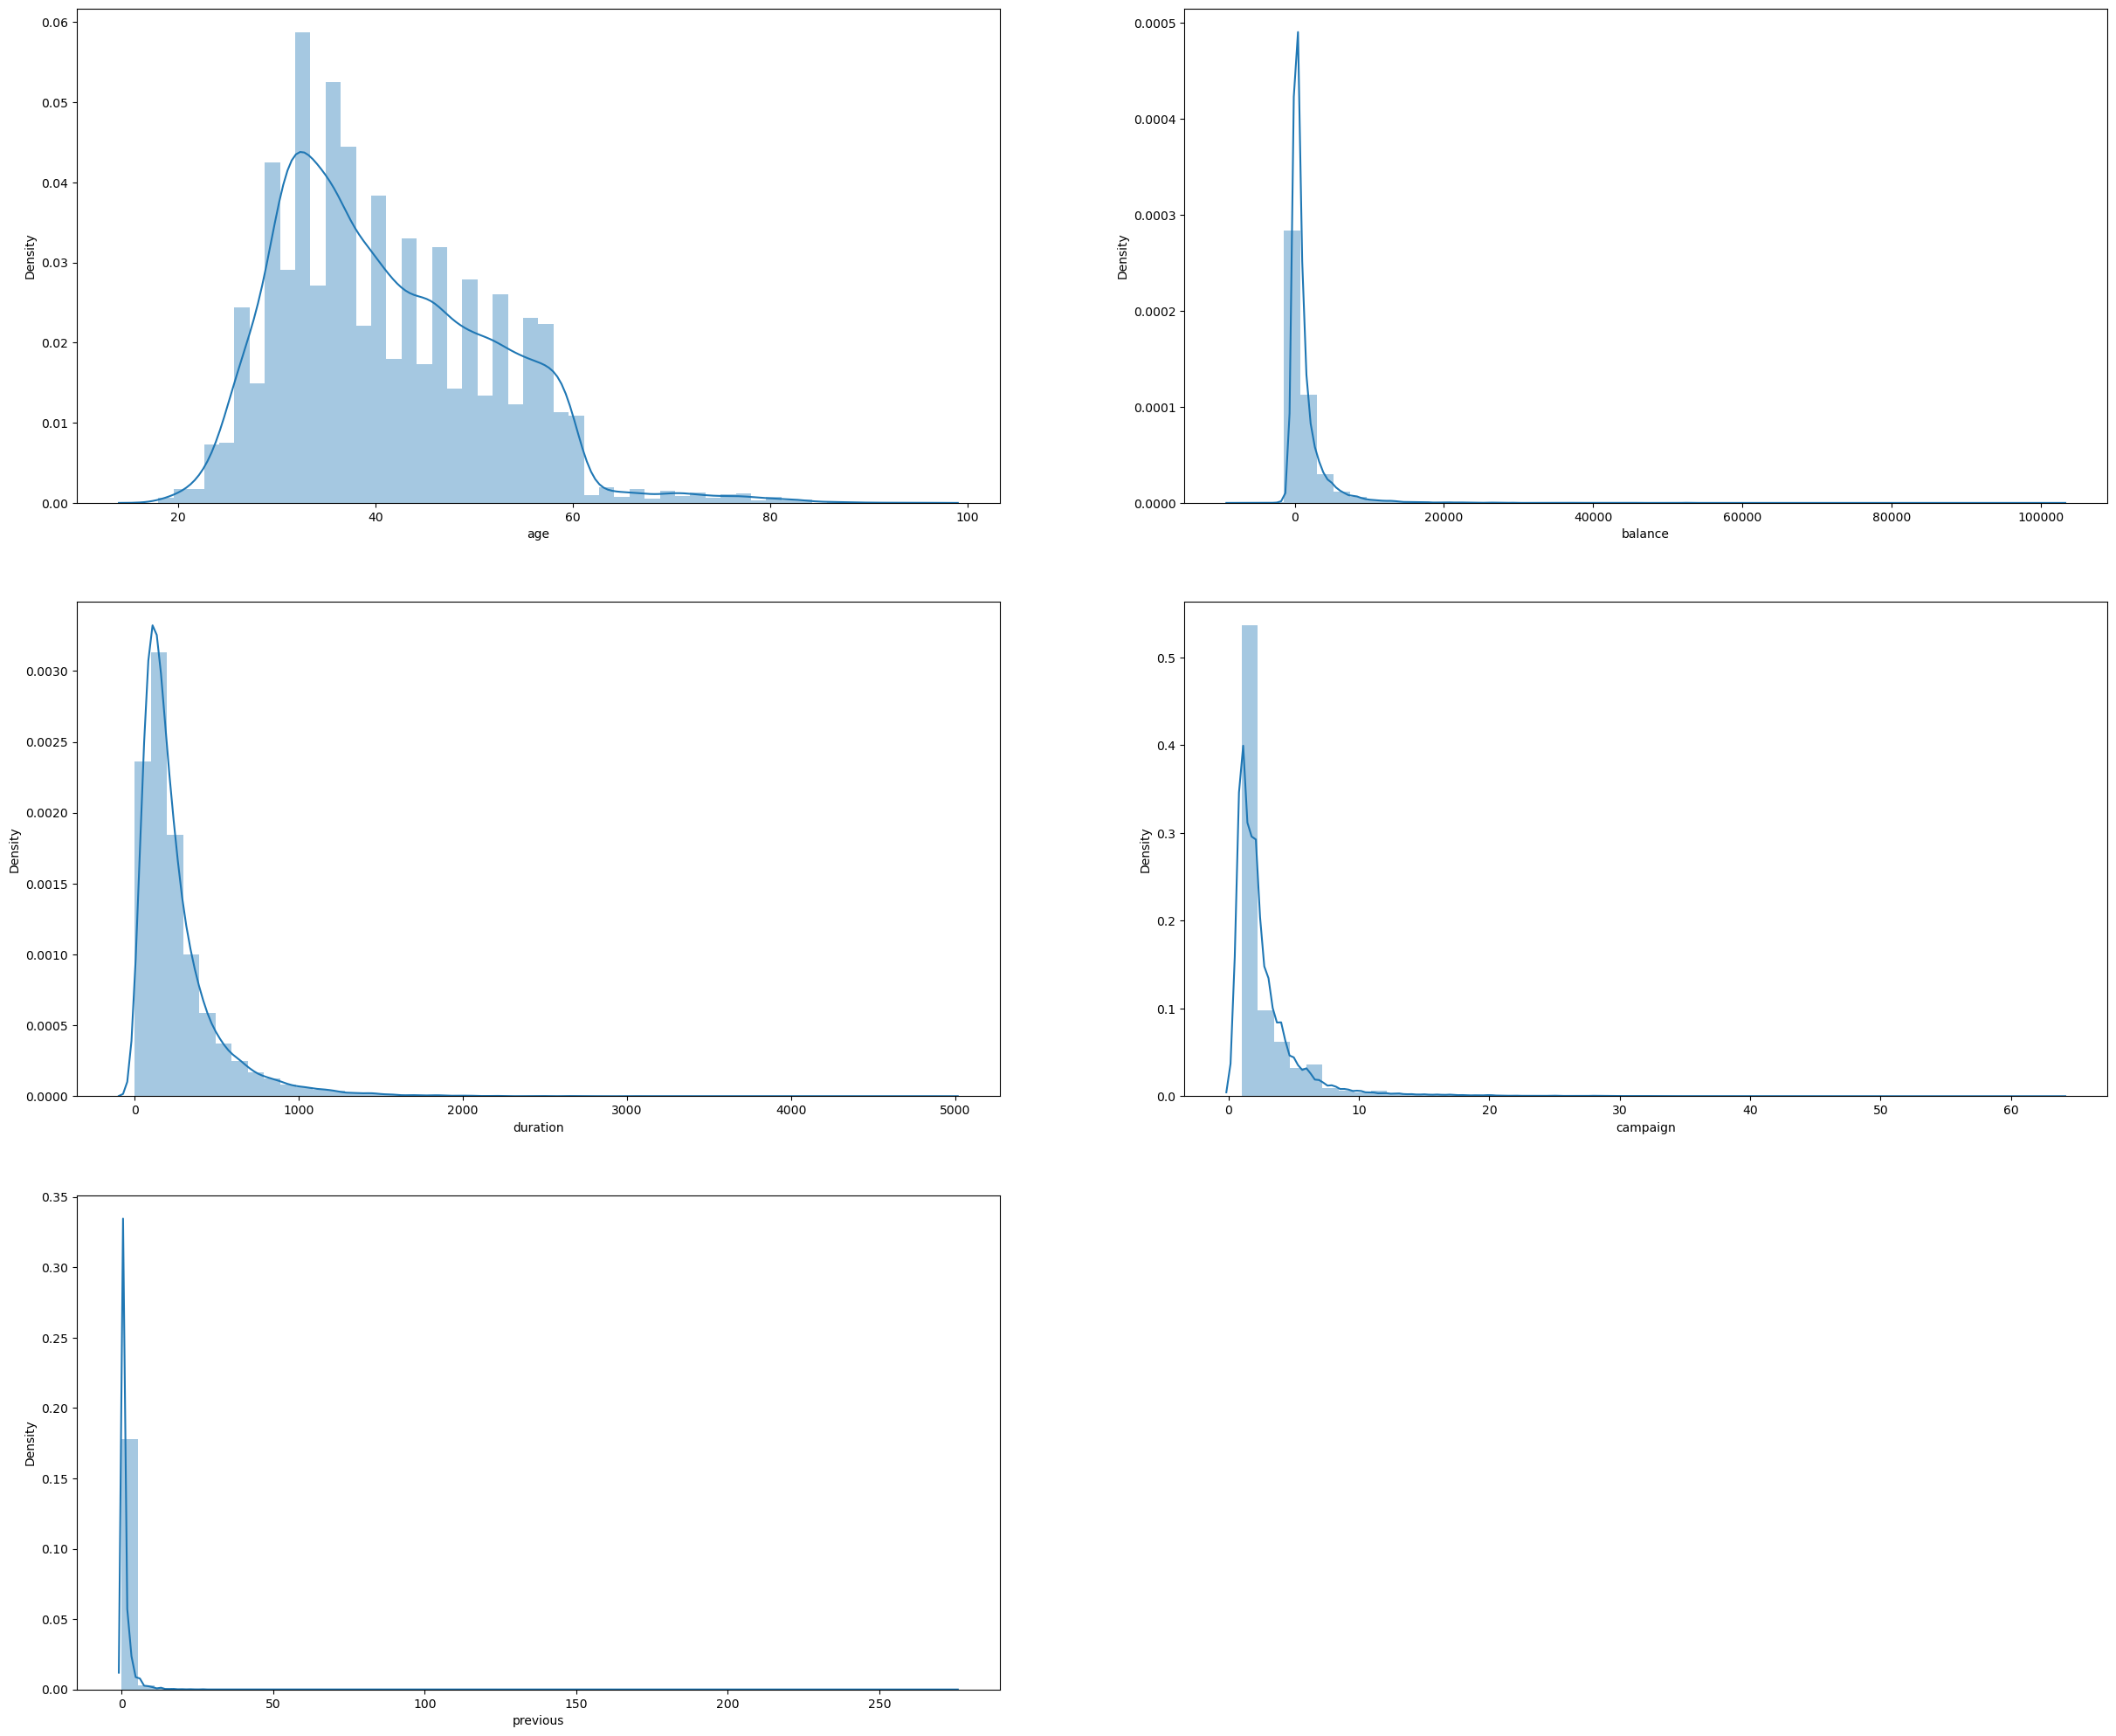

In [16]:
plt.figure(figsize=(30,25))

plotnumber = 1

for column in data[cont_data]:
    if plotnumber <=5:
        plt.subplot(3,2,plotnumber)
        sns.distplot(data[cont_data][column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

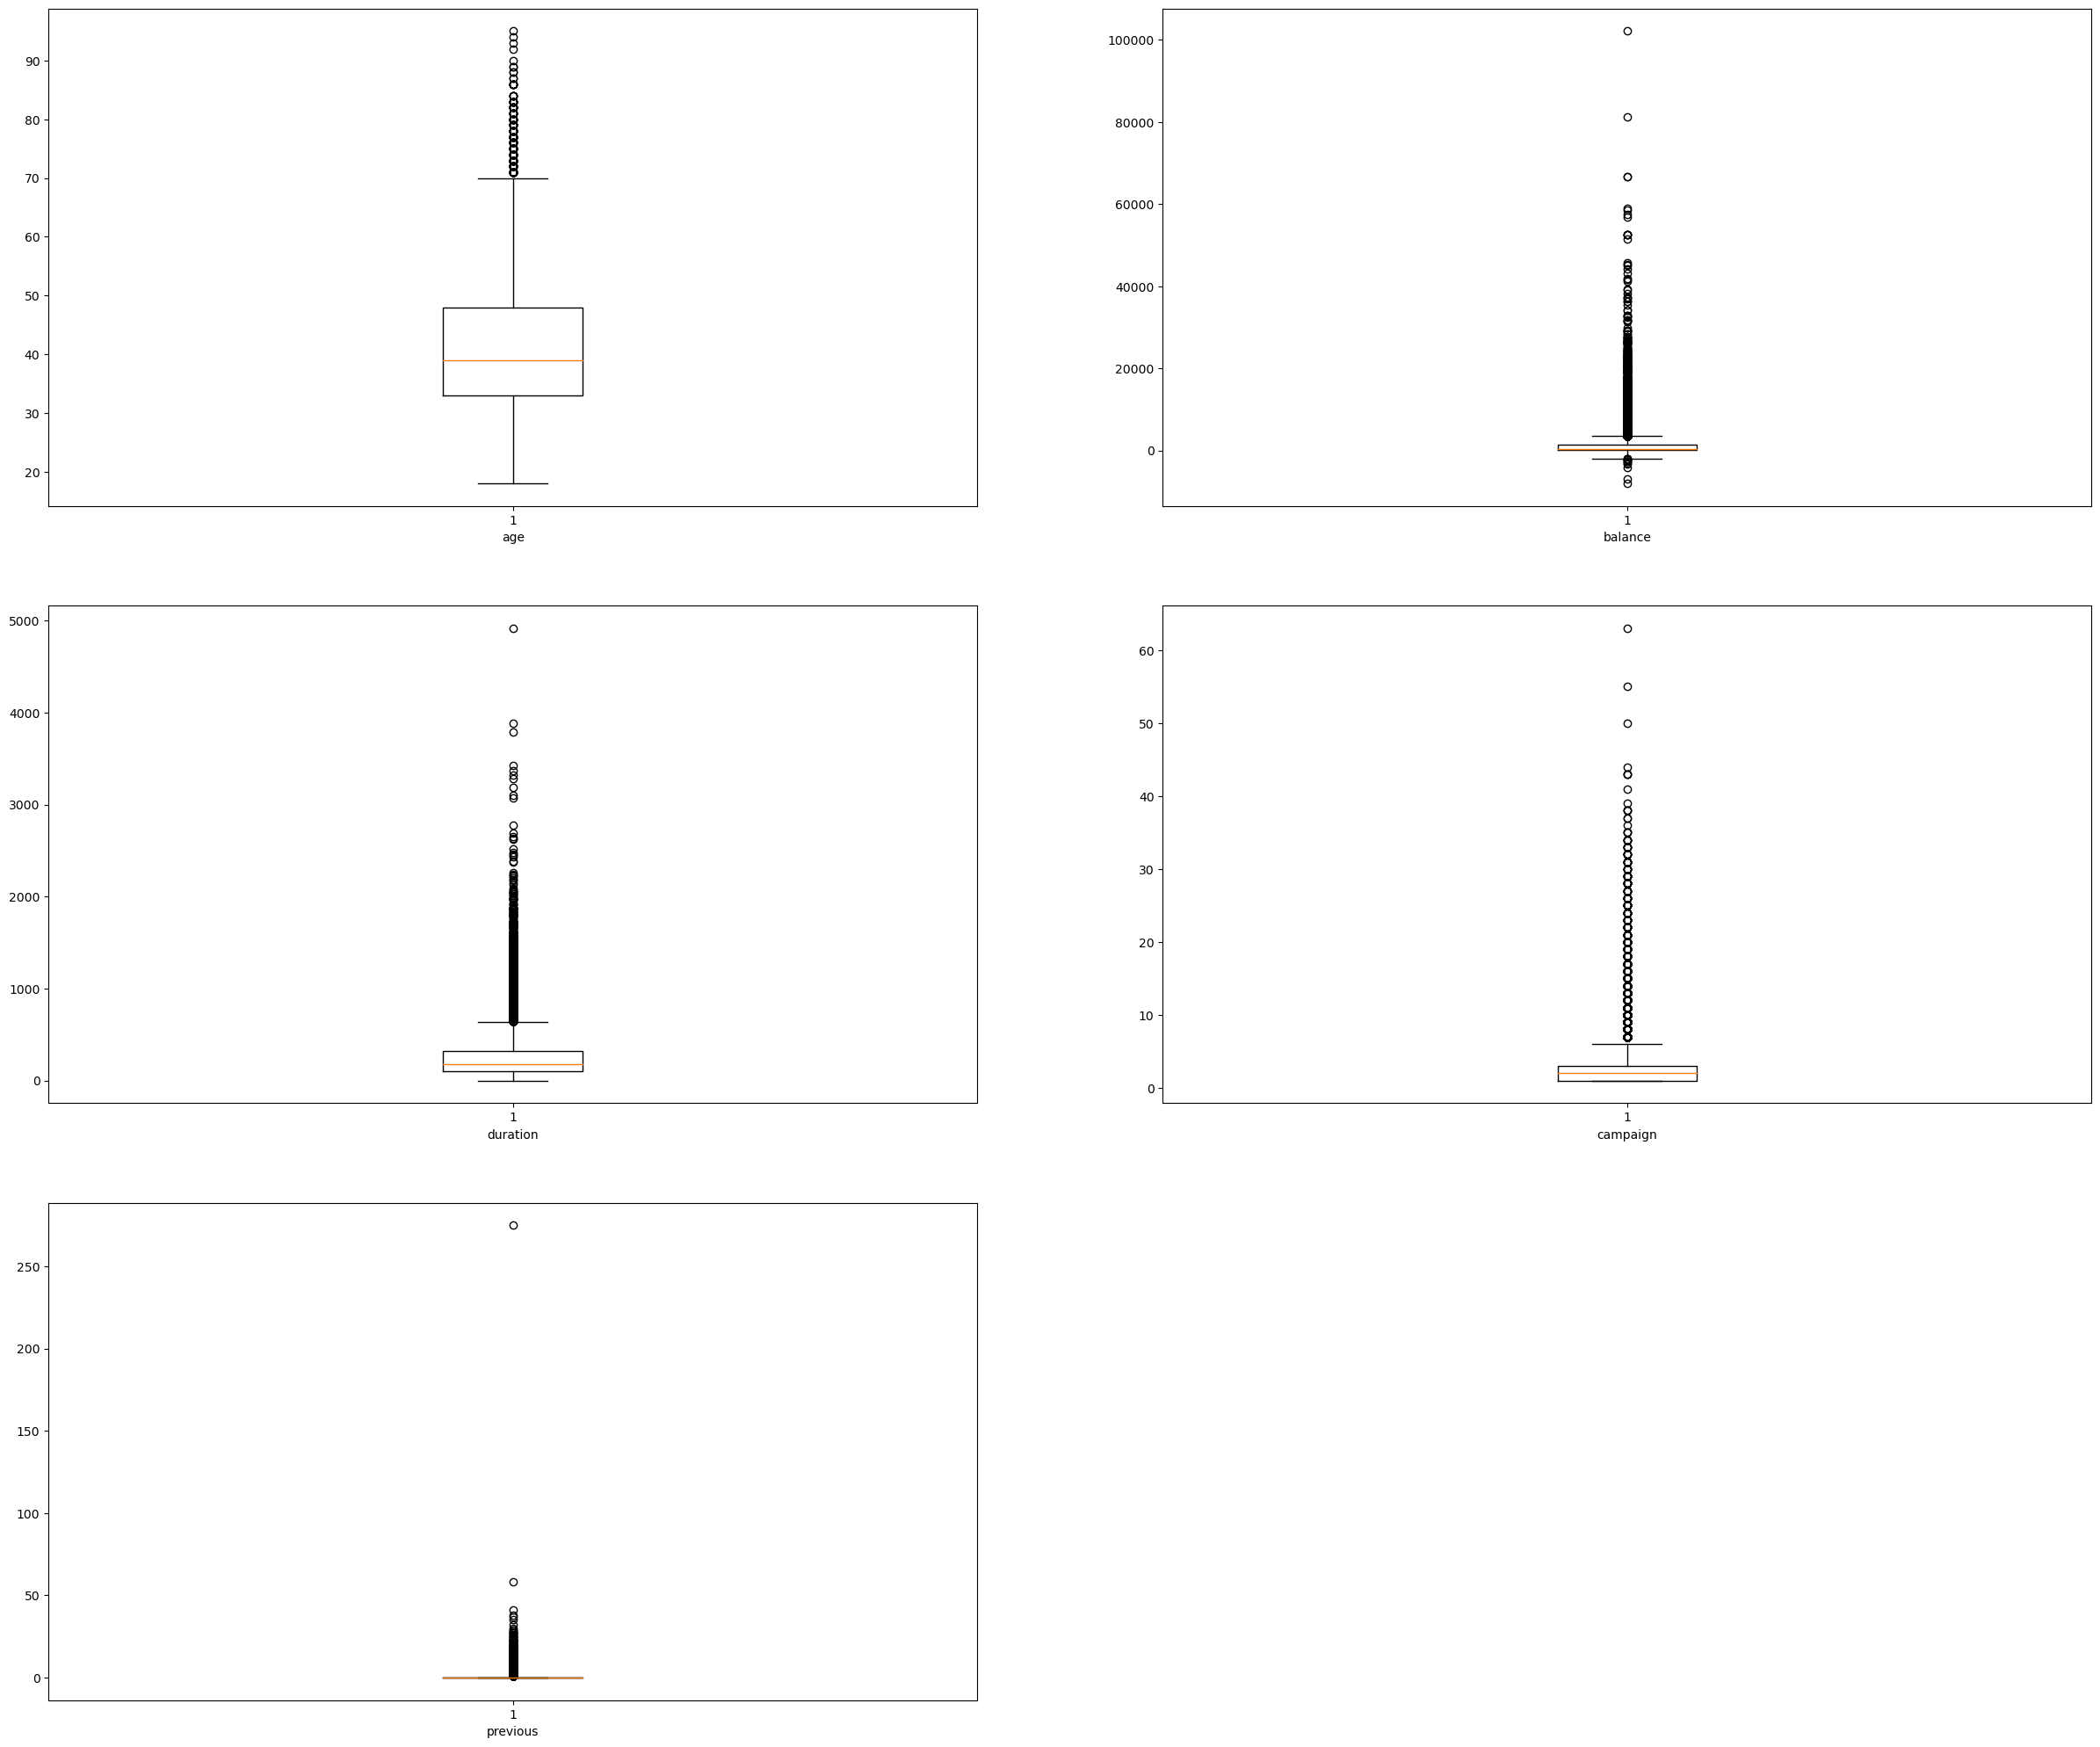

In [17]:
plt.figure(figsize=(30,25))

plotnumber = 1

for column in data[cont_data]:
    if plotnumber <=5:
        plt.subplot(3,2,plotnumber)
        plt.boxplot(x=data[cont_data][column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [18]:
data['subscribed'].replace({'yes':0,'no':1},inplace=True)

In [19]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,44,2,0,unknown,1
40576,31,unknown,married,secondary,no,3,no,no,cellular,91,2,0,unknown,1
15320,27,services,married,secondary,no,891,yes,no,cellular,240,1,0,unknown,1
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,867,1,3,success,0
29842,31,technician,married,secondary,no,119,yes,no,cellular,380,1,0,unknown,1


In [20]:
data['subscribed'].nunique()

2

In [21]:
data['subscribed'].value_counts()

1    27932
0     3715
Name: subscribed, dtype: int64

data set is not balanced

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
data['job'] = le.fit_transform(data['job'])

In [25]:
data['marital'] = le.fit_transform(data['marital'])

In [26]:
data['education'] = le.fit_transform(data['education'])

In [27]:
data['default'] = le.fit_transform(data['default'])

In [28]:
data['housing'] = le.fit_transform(data['housing'])

In [29]:
data['loan'] = le.fit_transform(data['loan'])

In [30]:
data['contact'] = le.fit_transform(data['contact'])

In [31]:
data['poutcome'] = le.fit_transform(data['poutcome'])

In [32]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,
26110,56,0,1,3,0,1933,0,0,1,44,2,0,3,1
40576,31,11,1,1,0,3,0,0,0,91,2,0,3,1
15320,27,7,1,1,0,891,1,0,0,240,1,0,3,1
43962,57,4,0,2,0,3287,0,0,0,867,1,3,2,0
29842,31,9,1,1,0,119,1,0,0,380,1,0,3,1


In [33]:
from scipy.stats import zscore

In [34]:
z = zscore(data[cont_data])

In [35]:
data = data[(z<3).all(axis=1)]

removing all outlers using zscore method

In [36]:
data.shape

(29244, 14)

In [37]:
data_loss = (31647-29244)/31647

In [38]:
data_loss

0.07593136790217082

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
mm = MinMaxScaler()

In [41]:
data[cont_data] = mm.fit_transform(data[cont_data])

In [42]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,
26110,0.703704,0,1,3,0,0.539053,0,0,1,0.042760,0.090909,0.000000,3,1
40576,0.240741,11,1,1,0,0.434514,0,0,0,0.088435,0.090909,0.000000,3,1
15320,0.166667,7,1,1,0,0.482613,1,0,0,0.233236,0.000000,0.000000,3,1
43962,0.722222,4,0,2,0,0.612393,0,0,0,0.842566,0.000000,0.428571,2,0
29842,0.240741,9,1,1,0,0.440797,1,0,0,0.369291,0.000000,0.000000,3,1


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
sm = SMOTE(sampling_strategy=0.80)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x = data.drop('subscribed',axis=1)

y = data['subscribed']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=9)

In [48]:
y_train.value_counts()

1    19660
0     2273
Name: subscribed, dtype: int64

In [49]:
x_train,y_train = sm.fit_resample(x_train,y_train)

In [50]:
y_train.value_counts()

1    19660
0    15728
Name: subscribed, dtype: int64

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

# LR

In [54]:
lr = LogisticRegression()

In [55]:
lr.fit(x_train,y_train)

LogisticRegression()

In [56]:
pred1 = lr.predict(x_train)

In [57]:
pred2 = lr.predict(x_test)

In [60]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.8148807505369051


In [61]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.8201340445903433


In [62]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.33      0.73      0.46       762
           1       0.96      0.83      0.89      6549

    accuracy                           0.82      7311
   macro avg       0.65      0.78      0.68      7311
weighted avg       0.90      0.82      0.85      7311



In [63]:
print(confusion_matrix(y_test,pred2))

[[ 556  206]
 [1109 5440]]


In [64]:
cv = cross_val_score(lr,x,y)

cv_mean = cv.mean()

cv_mean

0.9001846516258816

# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier()

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
pred1 = knn.predict(x_train)

In [70]:
pred2 = knn.predict(x_test)

In [71]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.9191251271617498


In [72]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.8067295855560115


In [73]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.30      0.62      0.40       762
           1       0.95      0.83      0.88      6549

    accuracy                           0.81      7311
   macro avg       0.62      0.73      0.64      7311
weighted avg       0.88      0.81      0.83      7311



In [74]:
print(confusion_matrix(y_test,pred2))

[[ 475  287]
 [1126 5423]]


In [75]:
cv = cross_val_score(knn,x,y)

cv_mean = cv.mean()

cv_mean

0.900868412269662

# DT

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier()

In [79]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
pred1 = dt.predict(x_train)

In [81]:
pred2 = dt.predict(x_test)

In [82]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 1.0


In [83]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.8372315688688278


In [84]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.31      0.46      0.37       762
           1       0.93      0.88      0.91      6549

    accuracy                           0.84      7311
   macro avg       0.62      0.67      0.64      7311
weighted avg       0.87      0.84      0.85      7311



In [85]:
print(confusion_matrix(y_test,pred2))

[[ 353  409]
 [ 781 5768]]


In [86]:
cv = cross_val_score(dt,x,y)

cv_mean = cv.mean()

cv_mean

0.864998167516797

# RF

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier()

In [89]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
pred1 = rf.predict(x_train)

In [91]:
pred2 = rf.predict(x_test)

In [92]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 1.0


In [93]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.8768978251949118


In [94]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.43      0.53      0.47       762
           1       0.94      0.92      0.93      6549

    accuracy                           0.88      7311
   macro avg       0.69      0.72      0.70      7311
weighted avg       0.89      0.88      0.88      7311



In [95]:
cv = cross_val_score(rf,x,y)

cv_mean = cv.mean()

cv_mean

0.9069894967255033

# ada

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
ada = AdaBoostClassifier()

In [99]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [100]:
pred1 = ada.predict(x_train)

In [101]:
pred2 = ada.predict(x_test)

In [102]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.8687408160958517


In [103]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.8543290931473123


In [104]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.38      0.65      0.48       762
           1       0.96      0.88      0.92      6549

    accuracy                           0.85      7311
   macro avg       0.67      0.76      0.70      7311
weighted avg       0.90      0.85      0.87      7311



In [105]:
cv = cross_val_score(ada,x,y)

cv_mean = cv.mean()

cv_mean

0.906544982141767

# GBDT

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
gb = GradientBoostingClassifier()

In [109]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [110]:
pred1 = gb.predict(x_train)

In [111]:
pred2 = gb.predict(x_test)

In [112]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.8919407708827851


In [113]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.8636301463548078


In [114]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.41      0.66      0.50       762
           1       0.96      0.89      0.92      6549

    accuracy                           0.86      7311
   macro avg       0.68      0.77      0.71      7311
weighted avg       0.90      0.86      0.88      7311



In [115]:
print(confusion_matrix(y_test,pred2))

[[ 502  260]
 [ 737 5812]]


In [116]:
cv = cross_val_score(gb,x,y)

cv_mean = cv.mean()

cv_mean

0.9085624268673144

# XGB

In [117]:
from xgboost import XGBClassifier

In [118]:
xg = XGBClassifier()

In [119]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [120]:
pred1 = xg.predict(x_train)

In [121]:
pred2 = xg.predict(x_test)

In [122]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.9633208997400249


In [123]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.8980987553002325


In [124]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.51      0.44      0.47       762
           1       0.94      0.95      0.94      6549

    accuracy                           0.90      7311
   macro avg       0.72      0.69      0.71      7311
weighted avg       0.89      0.90      0.89      7311



In [125]:
print(confusion_matrix(y_test,pred2))

[[ 332  430]
 [ 315 6234]]


In [126]:
cv = cross_val_score(xg,x,y)

cv_mean = cv.mean()

cv_mean

0.9063397720891408

# SVM

In [127]:
from sklearn.svm import SVC

In [128]:
svc = SVC()

In [129]:
svc.fit(x_train,y_train)

SVC()

In [130]:
pred1 = svc.predict(x_train)

In [131]:
pred2 = svc.predict(x_test)

In [132]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.8267774386797785


In [133]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.827109834495965


In [134]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.35      0.75      0.47       762
           1       0.97      0.84      0.90      6549

    accuracy                           0.83      7311
   macro avg       0.66      0.79      0.69      7311
weighted avg       0.90      0.83      0.85      7311



In [135]:
print(confusion_matrix(y_test,pred2))

[[ 569  193]
 [1071 5478]]


In [136]:
cv = cross_val_score(svc,x,y)

cv_mean = cv.mean()

cv_mean

0.8962180271441398

SVM is the the better model of all 

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

Text(0, 0.5, 'True Positive Rate')

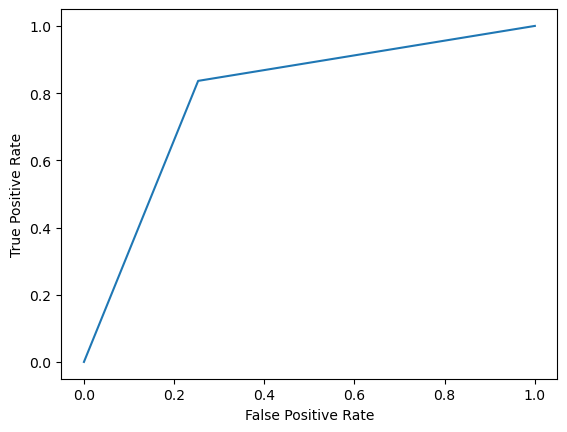

In [138]:
fpr, tpr, thresholds = roc_curve(y_test,pred2)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# HYPER PARAMETER TUNING

In [139]:
svc = SVC()

In [140]:
para = {'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
       'gamma':['scale', 'auto'],
       'decision_function_shape':['ovo', 'ovr'],
       'C':np.arange(0.1,1,0.01)}

In [142]:
from sklearn.model_selection import RandomizedSearchCV

In [143]:
rs = RandomizedSearchCV(svc,para,n_jobs=1)

In [144]:
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=SVC(), n_jobs=1,
                   param_distributions={'C': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precomputed']})

In [145]:
rs.best_params_

{'kernel': 'poly',
 'gamma': 'auto',
 'decision_function_shape': 'ovo',
 'C': 0.9799999999999995}

In [146]:
rs.best_estimator_.fit(x_train,y_train)

SVC(C=0.9799999999999995, decision_function_shape='ovo', gamma='auto',
    kernel='poly')

In [147]:
pred1 = rs.best_estimator_.predict(x_train)

In [148]:
pred2 = rs.best_estimator_.predict(x_test)

In [149]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.8292924155080819


In [150]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.8220489673095336


In [151]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.34      0.76      0.47       762
           1       0.97      0.83      0.89      6549

    accuracy                           0.82      7311
   macro avg       0.65      0.79      0.68      7311
weighted avg       0.90      0.82      0.85      7311



In [152]:
print(confusion_matrix(y_test,pred2))

[[ 577  185]
 [1116 5433]]


In [153]:
conc = pd.DataFrame({"Actual":y_test,"Predicted":pred2})

In [154]:
conc

,Actual,Predicted
ID,,
25510,1,1
32576,1,1
31883,1,1
38234,1,1
18272,1,1
...,...,...
10677,1,1
8696,1,1
22892,1,1


# testing on test Data

In [155]:
test_data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [156]:
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [157]:
test_data.drop(['day','month','pdays'],axis=1,inplace=True)

In [159]:
test_data.shape

(13564, 14)

In [160]:
test_data.set_index('ID',inplace=True)

In [161]:
test_data['job'] = le.fit_transform(test_data['job'])

In [162]:
test_data['marital'] = le.fit_transform(test_data['marital'])


In [163]:
test_data['education'] = le.fit_transform(test_data['education'])

In [164]:
test_data['default'] = le.fit_transform(test_data['default'])

In [165]:
test_data['housing'] = le.fit_transform(test_data['housing'])

In [166]:
test_data['loan'] = le.fit_transform(test_data['loan'])

In [167]:
test_data['contact'] = le.fit_transform(test_data['contact'])

In [168]:
test_data['poutcome'] = le.fit_transform(test_data['poutcome'])

In [169]:
cooont_data = test_data.select_dtypes('int64').columns.tolist()

In [170]:
cooont_data

['age', 'balance', 'duration', 'campaign', 'previous']

In [171]:
mm = MinMaxScaler()

In [174]:
test_data[cooont_data] = mm.fit_transform(test_data[cooont_data])

In [177]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome
ID,,,,,,,,,,,,,
38441,0.181818,7,1,1,0,0.033727,1,0,0,0.006148,0.087719,0.0,3
40403,0.779221,5,0,0,0,0.059963,0,0,1,0.114356,0.000000,0.0,3
3709,0.168831,6,2,2,0,0.033982,1,0,2,0.207808,0.000000,0.0,3
37422,0.506494,7,2,0,0,0.069694,1,0,1,0.019982,0.017544,0.0,3
12527,0.350649,1,0,1,0,0.025636,0,1,2,0.034122,0.000000,0.0,3


In [178]:
pred = rs.best_estimator_.predict(test_data)

In [180]:
print(pred)

[1 1 1 ... 1 0 1]


In [185]:
outcome = pd.DataFrame({'Result':pred})

In [186]:
outcome

,Result
0,1
1,1
2,1
3,1
4,1
...,...
13559,1
13560,1
13561,1
13562,0
